In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/unclean_smartwatch_health_data.csv')
df.head()

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6


In [ ]:
len(df) #quantidade de linha

10000

In [ ]:
empty_cells = df.isna().sum()
duplicateds = df.duplicated().sum()

print(empty_cells)
print(duplicateds)

user_id                   0
heart_rate_(bpm)          0
blood_oxygen_level_(%)    0
step_count                0
sleep_duration_(hours)    0
activity_level            0
stress_level              0
dtype: int64
0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   float64
 1   Heart Rate (BPM)        9600 non-null   float64
 2   Blood Oxygen Level (%)  9700 non-null   float64
 3   Step Count              9900 non-null   float64
 4   Sleep Duration (hours)  9850 non-null   object 
 5   Activity Level          9800 non-null   object 
 6   Stress Level            9800 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()

In [ ]:
df['activity_level'].unique()

df = df.replace({'Highly_Active':'Highly Active', 'Seddentary': 'Sedentary','Actve':'Active'})

In [ ]:
df['sleep_duration_(hours)']= pd.to_numeric(df['sleep_duration_(hours)'],errors='coerce')
df['stress_level'] = pd.to_numeric(df['stress_level'],errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 9799 non-null   float64
 1   heart_rate_(bpm)        9600 non-null   float64
 2   blood_oxygen_level_(%)  9700 non-null   float64
 3   step_count              9900 non-null   float64
 4   sleep_duration_(hours)  9603 non-null   float64
 5   activity_level          9800 non-null   object 
 6   stress_level            9751 non-null   float64
dtypes: float64(6), object(1)
memory usage: 547.0+ KB


In [ ]:
df['activity_level'].unique()

array(['Highly Active', 'Actve', 'Sedentary', 'Active'], dtype=object)

In [ ]:
df= df.dropna()
df.isna().sum()

,0
user_id,0
heart_rate_(bpm),0
blood_oxygen_level_(%),0
step_count,0
sleep_duration_(hours),0
activity_level,0
stress_level,0


In [ ]:
df.describe()

,user_id,heart_rate_(bpm),blood_oxygen_level_(%),step_count,sleep_duration_(hours),stress_level
count,8287.000000,8287.000000,8287.000000,8287.000000,8287.000000,8287.000000
mean,3008.310969,76.000396,97.837248,6996.275243,6.504998,5.433691
std,1152.853217,19.030185,1.739699,6904.773042,1.510821,2.869335
min,1001.000000,40.000000,90.791208,0.910138,-0.194453,1.000000
25%,1998.500000,64.921323,96.654310,1994.654512,5.484881,3.000000
50%,3006.000000,75.321211,98.001247,4970.878786,6.497615,5.000000
75%,4005.000000,85.324321,99.377902,9765.357223,7.532584,8.000000
max,4999.000000,292.923300,100.000000,62486.690753,12.140233,10.000000


In [ ]:
Q1, Q3 = np.percentile(df['heart_rate_(bpm)'],[25,75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['heart_rate_(bpm)'] < lower_bound) | (df['heart_rate_(bpm)'] > upper.bound)].sort_values(by='heart_rate_(bpm)', ascending=True).reset_index()
print(outliers)

    index  user_id  heart_rate_(bpm)  blood_oxygen_level_(%)    step_count  \
0    7881   4036.0        116.046671               99.189514   4234.904392   
1    2963   4854.0        116.861225               95.441825   4707.416893   
2    5467   2413.0        116.880898               95.349096   4705.427971   
3    1521   2955.0        117.159269               97.492693   3154.284533   
4    1188   2836.0        117.710608               99.308541  10506.814653   
5      47   2806.0        118.294933               95.629327    253.743297   
6    3817   2019.0        118.368178               98.121702   3011.045836   
7    4760   3352.0        118.532560               96.693494   5382.680886   
8    7620   4410.0        118.879206               97.585182    572.749332   
9    5351   2552.0        118.945165               99.177661   6489.376974   
10   6445   3382.0        119.424899               99.264651   6268.566239   
11   5674   2380.0        119.908576               96.858006   2

In [ ]:
len(outliers.index)

59

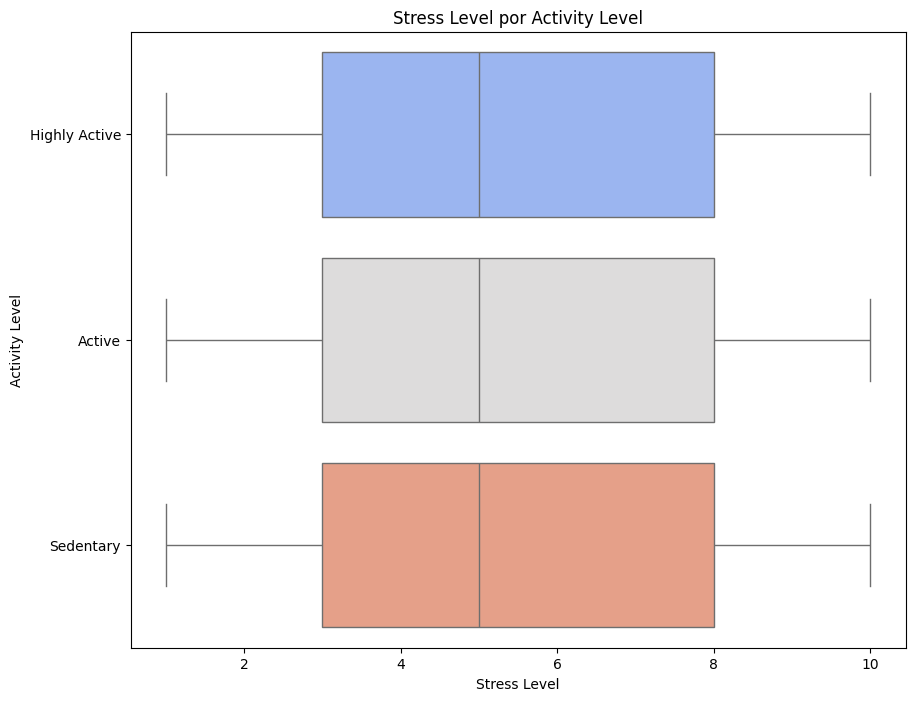

In [ ]:
#Stress Level por Activity Level
plt.figure(figsize=(10,8))

sns.boxplot(
    data = df,
    x = 'stress_level',
    y = 'activity_level',
    palette = 'coolwarm',
    hue = 'activity_level',
    legend = False
)

plt.title('Stress Level by Activity Level')
plt.xticks(size = 10)
plt.xlabel('Stress Level')
plt.ylabel('Activity Level')

plt.show()

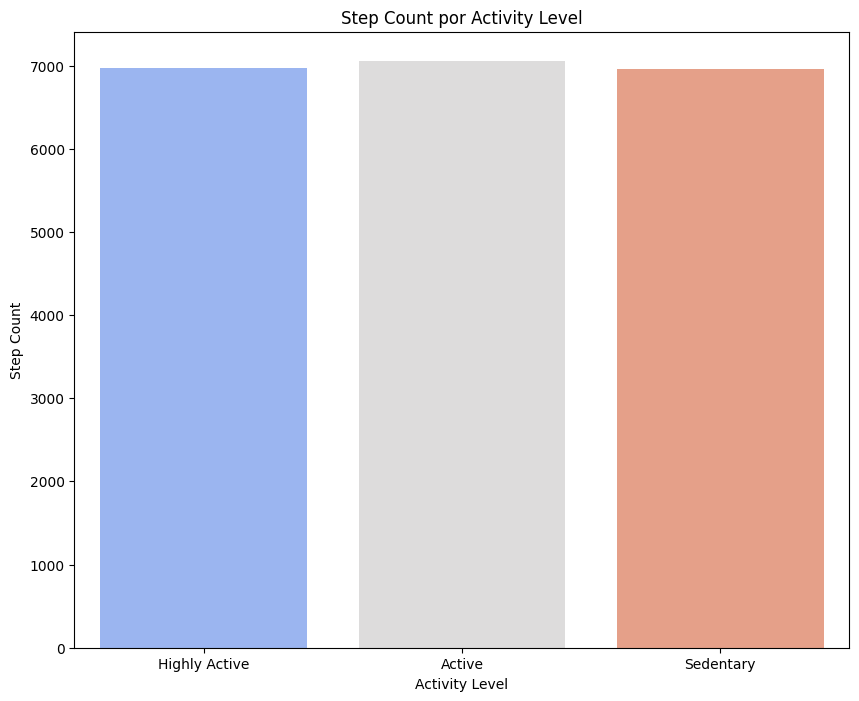

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(
    data = df,
    x = 'activity_level',
    y = 'step_count',
    estimator = np.mean,
    errorbar = None,
    palette = 'coolwarm',
    hue = 'activity_level',
    legend = False
)

plt.title('Average Step Count by Activity Level')
plt.xticks(size = 10)
plt.xlabel('Activity Level')
plt.ylabel('Step Count')

plt.show()

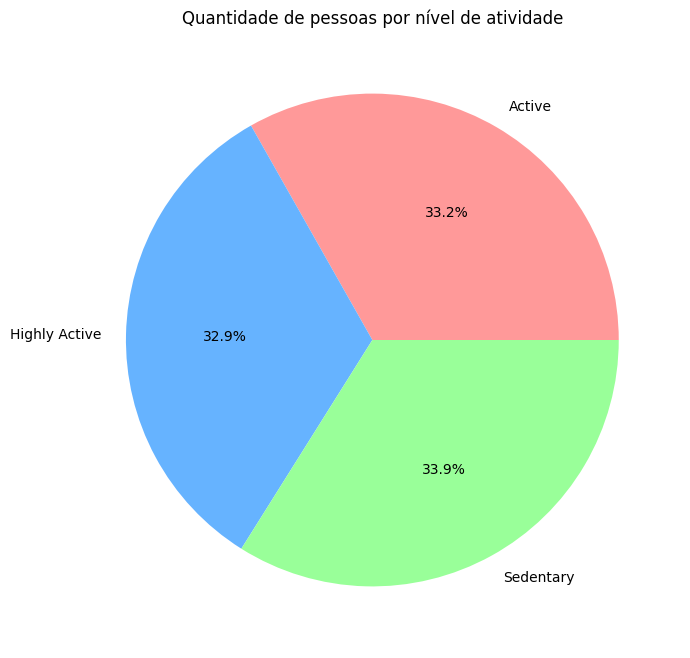

In [ ]:
niveldeatividade= df.groupby('activity_level')['user_id'].count().reset_index()
plt.figure(figsize=(10,8))
plt.pie(
    data = niveldeatividade,
    x = 'user_id',
    labels = 'activity_level',
    autopct='%1.1f%%',
    colors = ['#FF9999', '#66B3FF', '#99FF99']
)


plt.title('Distribution by Activity Level')
plt.xticks(size = 10)
plt.show()

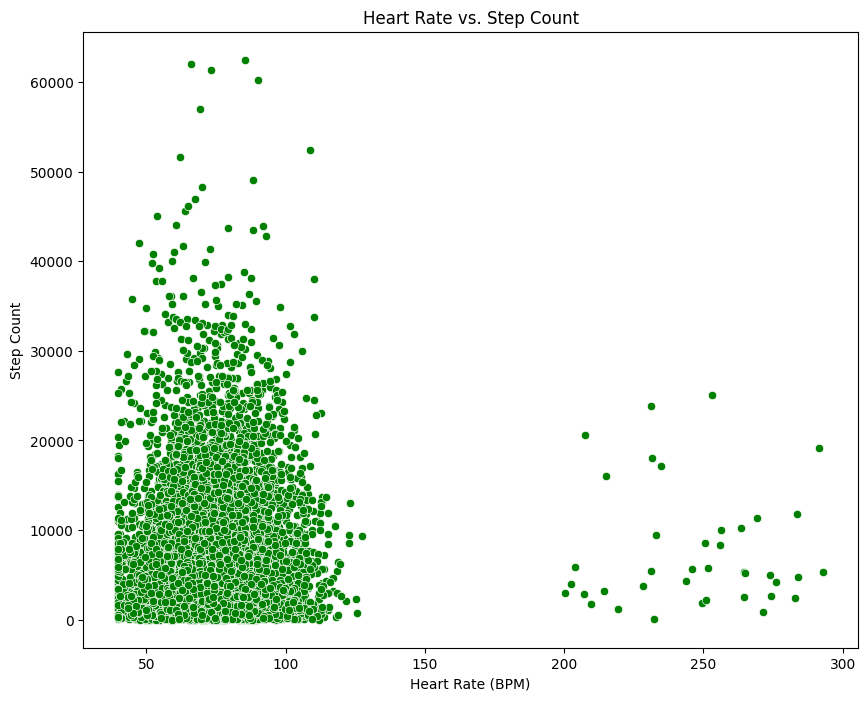

In [ ]:
plt.figure(figsize=(10,8))

sns.scatterplot(
    data = df,
    x='heart_rate_(bpm)',
    y = 'step_count',
    color = 'g'
)

plt.title('Heart Rate vs. Step Count')
plt.xticks(size = 10)
plt.xlabel('Heart Rate (BPM)')
plt.ylabel('Step Count')

plt.show()

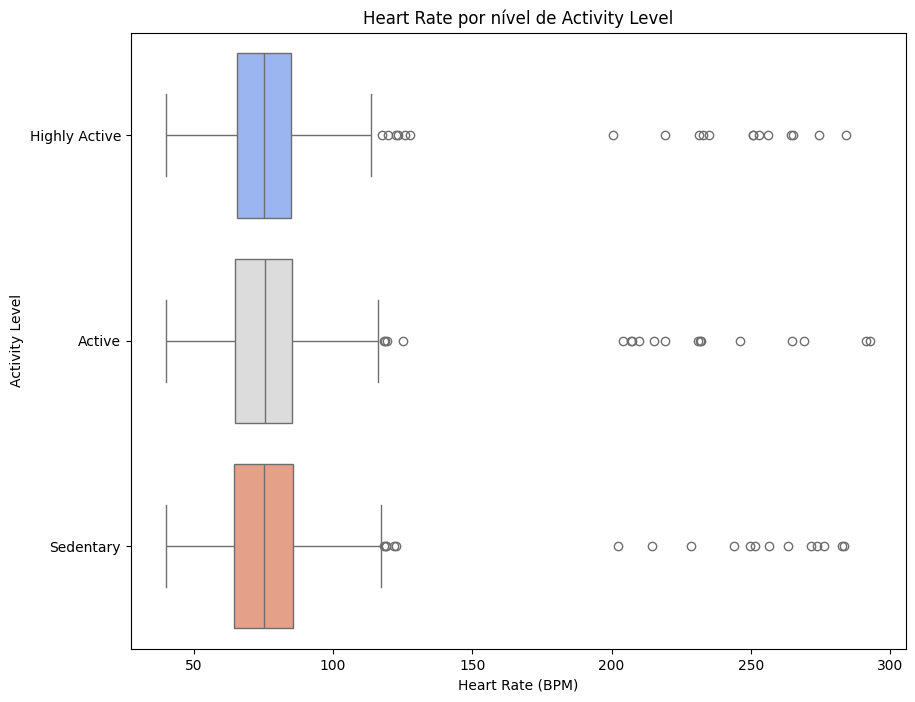

In [ ]:
#Heart Rate por nível de Activity Level.

plt.figure(figsize=(10,8))

sns.boxplot(
    data = df,
    x = 'heart_rate_(bpm)',
    y = 'activity_level',
    palette = 'coolwarm',
    hue = 'activity_level',
    legend = False
)

plt.title('Heart Rate by Activity Level')
plt.xticks(size = 10)
plt.xlabel('Heart Rate (BPM)')
plt.ylabel('Activity Level')

plt.show()

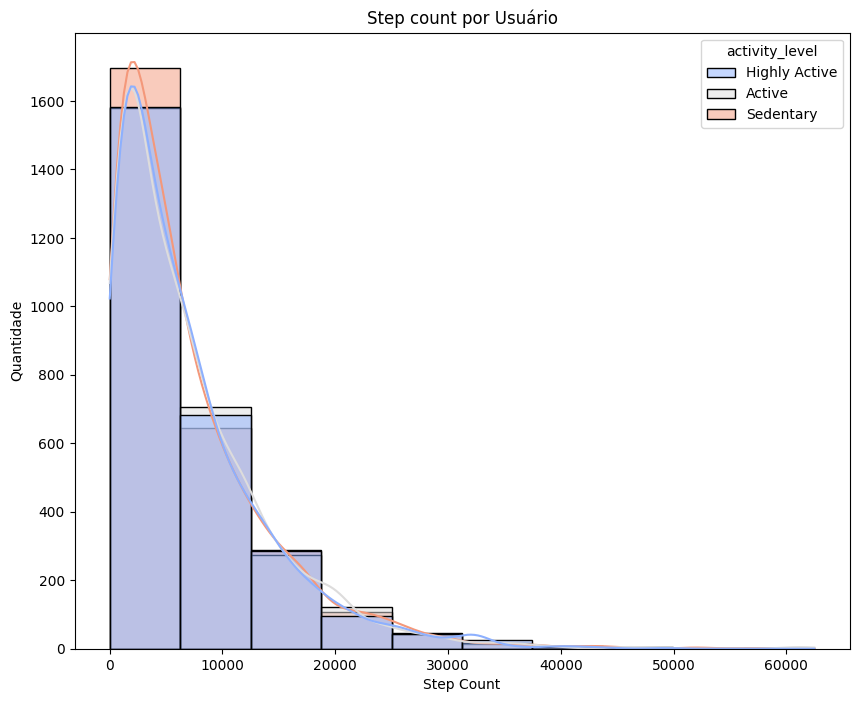

In [ ]:
plt.figure(figsize=(10,8))

sns.histplot(
    data = df,
    x = 'step_count',
    bins = 10,
    kde = True,
    palette = 'coolwarm',
    hue = 'activity_level',
    legend=True
)

plt.title('Distribution of Users by Step count)
plt.xlabel('Step Count')
plt.ylabel('Total Users')
plt.show()

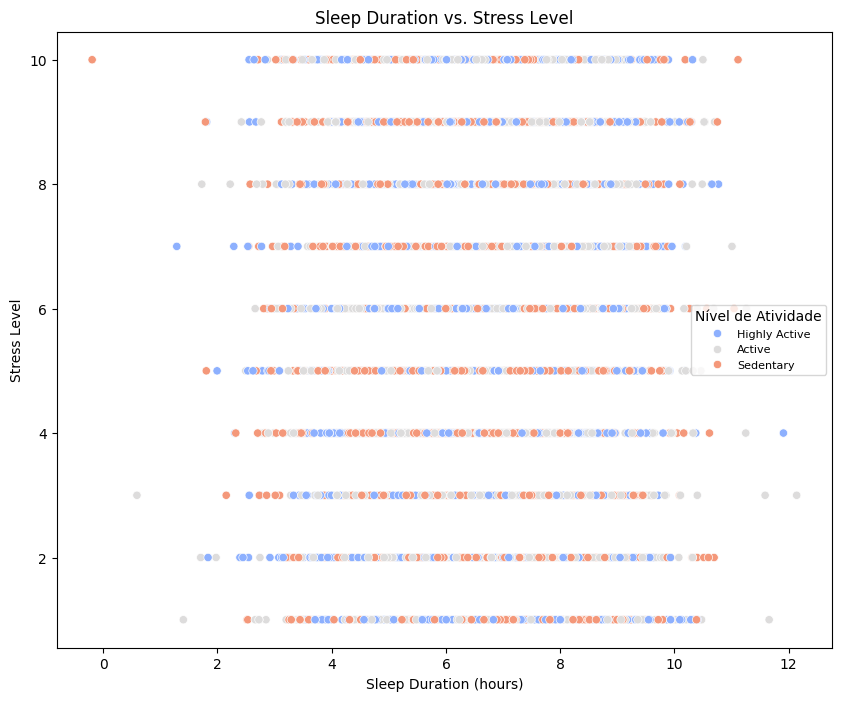

In [ ]:
plt.figure(figsize=(10,8))

sns.scatterplot(
    data = df,
    x = 'sleep_duration_(hours)',
    y = 'stress_level',
    hue = 'activity_level',
    palette = 'coolwarm'
)


plt.legend(title="Activity Level", loc="center right", fontsize=8)
plt.title('Sleep Duration vs. Stress Level')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Stress Level')
plt.show()

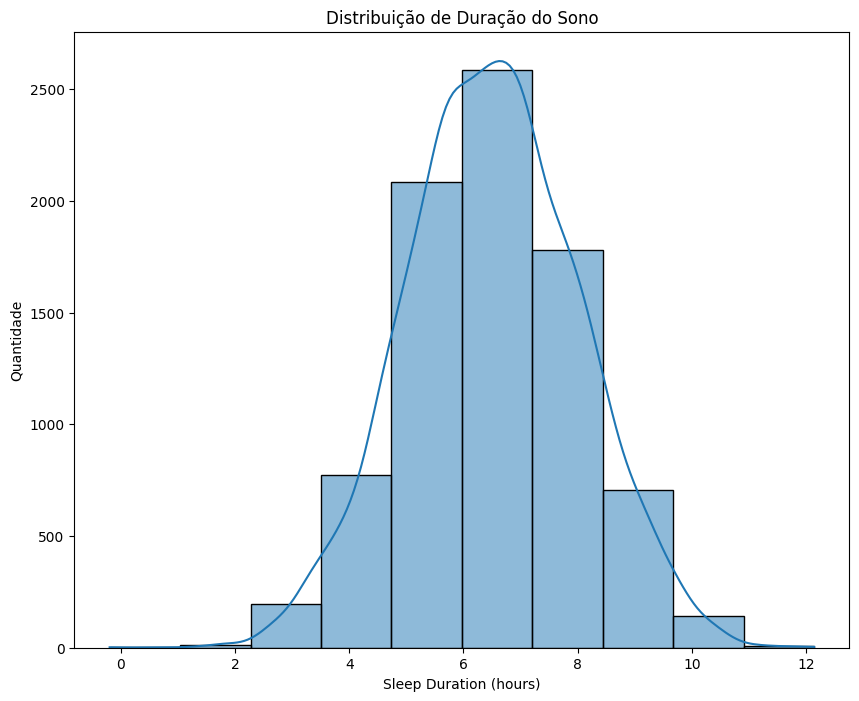

In [ ]:
plt.figure(figsize= (10,8))

sns.histplot(
    data = df,
    x = 'sleep_duration_(hours)',
    bins = 10,
    kde = True,
    palette = 'coolwarm'
)

plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Quantidade')

plt.show()

In [ ]:
avg_sleep = df['sleep_duration_(hours)'].mean()
median_sleep = df['sleep_duration_(hours)'].median()
max_sleep = df['sleep_duration_(hours)'].max()
min_sleep = df['sleep_duration_(hours)'].min()
print(f'Média de duração do sono: {avg_sleep:.2f} horas')
print(f'Mediana de duração do sono: {median_sleep:.2f} horas')
print(f'Máximo de duração do sono: {max_sleep:.2f} horas')
print(f'Mínimo de duração do sono: {min_sleep:.2f} horas')

Média de duração do sono: 6.50 horas
Mediana de duração do sono: 6.50 horas
Máximo de duração do sono: 12.14 horas
Mínimo de duração do sono: -0.19 horas


In [ ]:
df.describe()

,user_id,heart_rate_(bpm),blood_oxygen_level_(%),step_count,sleep_duration_(hours),stress_level
count,8287.000000,8287.000000,8287.000000,8287.000000,8287.000000,8287.000000
mean,3008.310969,76.000396,97.837248,6996.275243,6.504998,5.433691
std,1152.853217,19.030185,1.739699,6904.773042,1.510821,2.869335
min,1001.000000,40.000000,90.791208,0.910138,-0.194453,1.000000
25%,1998.500000,64.921323,96.654310,1994.654512,5.484881,3.000000
50%,3006.000000,75.321211,98.001247,4970.878786,6.497615,5.000000
75%,4005.000000,85.324321,99.377902,9765.357223,7.532584,8.000000
max,4999.000000,292.923300,100.000000,62486.690753,12.140233,10.000000


In [ ]:
df.loc[df['sleep_duration_(hours)'].round(2) < 0]

,user_id,heart_rate_(bpm),blood_oxygen_level_(%),step_count,sleep_duration_(hours),activity_level,stress_level
3366,1608.0,78.832837,100.0,7122.866517,-0.194453,Sedentary,10.0


In [ ]:
df[['sleep_duration_(hours)','stress_level']].corr(method='spearman')

,sleep_duration_(hours),stress_level
sleep_duration_(hours),1.000000,-0.007063
stress_level,-0.007063,1.000000


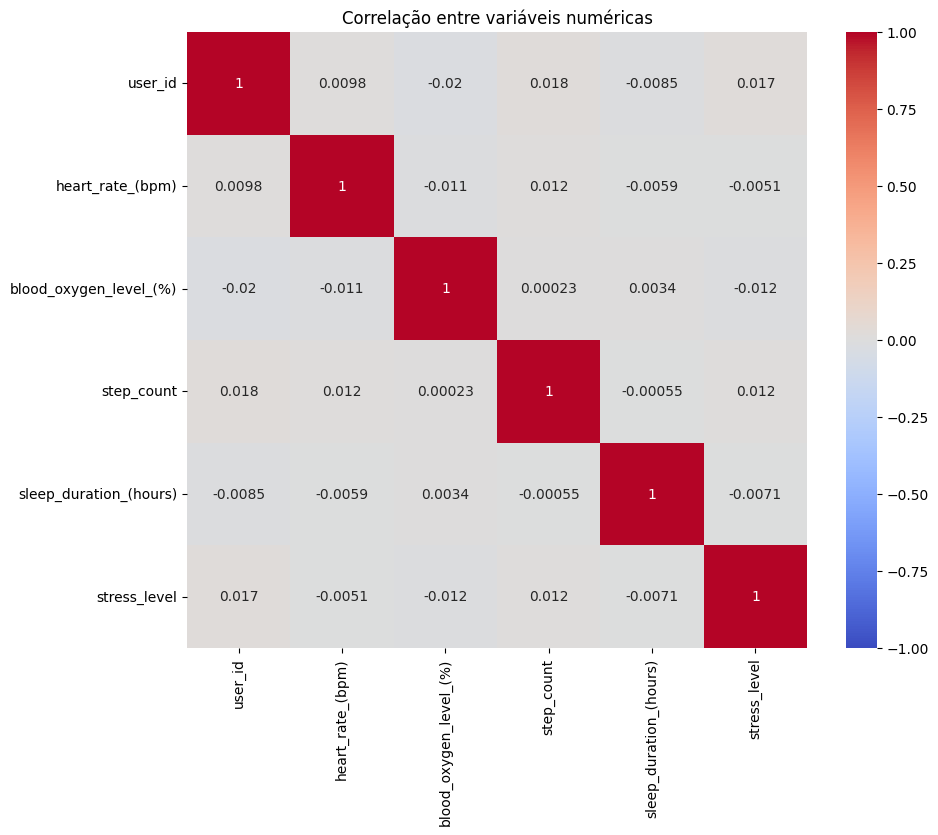

In [ ]:
plt.figure(figsize=(10,8))

sns.heatmap(
    data = numeric_columns.corr(method='spearman'),
    annot = True,
    cmap = 'coolwarm',
    vmin = -1,
    vmax = 1
)

plt.title('Correlação entre variáveis numéricas')
plt.show()


In [ ]:
numeric_columns = df.select_dtypes(include=[np.number])

numeric_columns.corr(method='spearman')

,user_id,heart_rate_(bpm),blood_oxygen_level_(%),step_count,sleep_duration_(hours),stress_level
user_id,1.000000,0.009751,-0.019736,0.018055,-0.008494,0.017497
heart_rate_(bpm),0.009751,1.000000,-0.010889,0.011941,-0.005923,-0.005051
blood_oxygen_level_(%),-0.019736,-0.010889,1.000000,0.000228,0.003418,-0.011857
step_count,0.018055,0.011941,0.000228,1.000000,-0.000546,0.011544
sleep_duration_(hours),-0.008494,-0.005923,0.003418,-0.000546,1.000000,-0.007063
stress_level,0.017497,-0.005051,-0.011857,0.011544,-0.007063,1.000000


In [ ]:
numeric_outliers = df.select_dtypes(include=[np.number])

numeric_outliers.corr(method='spearman')

,user_id,heart_rate_(bpm),blood_oxygen_level_(%),step_count,sleep_duration_(hours),stress_level
user_id,1.000000,0.009751,-0.019736,0.018055,-0.008494,0.017497
heart_rate_(bpm),0.009751,1.000000,-0.010889,0.011941,-0.005923,-0.005051
blood_oxygen_level_(%),-0.019736,-0.010889,1.000000,0.000228,0.003418,-0.011857
step_count,0.018055,0.011941,0.000228,1.000000,-0.000546,0.011544
sleep_duration_(hours),-0.008494,-0.005923,0.003418,-0.000546,1.000000,-0.007063
stress_level,0.017497,-0.005051,-0.011857,0.011544,-0.007063,1.000000


In [ ]:
df_wt_outliers = df[(df['heart_rate_(bpm)'] >= lower_bound) & (df['heart_rate_(bpm)'] <= upper_bound)]
numeric_df_wt_outliers = df.select_dtypes(include=[np.number])
numeric_df_wt_outliers.corr(method='spearman')

,user_id,heart_rate_(bpm),blood_oxygen_level_(%),step_count,sleep_duration_(hours),stress_level
user_id,1.000000,0.009751,-0.019736,0.018055,-0.008494,0.017497
heart_rate_(bpm),0.009751,1.000000,-0.010889,0.011941,-0.005923,-0.005051
blood_oxygen_level_(%),-0.019736,-0.010889,1.000000,0.000228,0.003418,-0.011857
step_count,0.018055,0.011941,0.000228,1.000000,-0.000546,0.011544
sleep_duration_(hours),-0.008494,-0.005923,0.003418,-0.000546,1.000000,-0.007063
stress_level,0.017497,-0.005051,-0.011857,0.011544,-0.007063,1.000000
